In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [12]:
data = np.loadtxt('/home/chris/PythonAdvanced/090924/time_BHillustris1_30.dat', usecols=(6, 7))
# Swap the values if m1 is less than m2
m1 = np.maximum(data[:, 0], data[:, 1])
m2 = np.minimum(data[:, 0], data[:, 1])

In [5]:
# Define the bin size and range
delta_m = 0.5  # Bin width in solar masses
min_mass = 0   # Minimum mass
max_mass = 100 # Adjust based on the mass range in the dataset

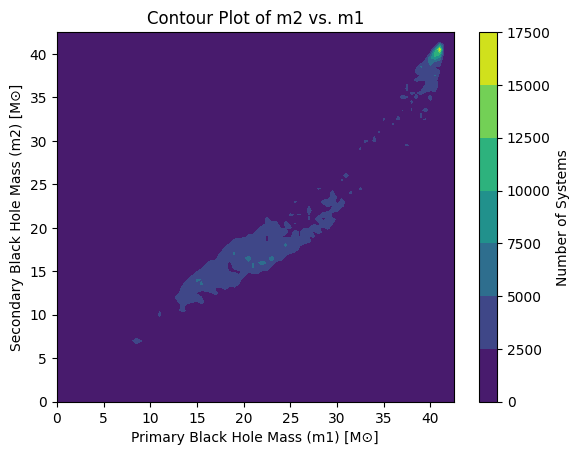

In [13]:
# Define the mass bin edges (with step size of 0.5 M⊙)
bin_width = 0.5
bins = np.arange(0, np.max(m1), bin_width)

# Calculate the 2D histogram of m1 and m2
hist, xedges, yedges = np.histogram2d(m1, m2, bins=[bins, bins])

# Plot the contour map
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='viridis')
plt.colorbar(label='Number of Systems')
plt.xlabel('Primary Black Hole Mass (m1) [M⊙]')
plt.ylabel('Secondary Black Hole Mass (m2) [M⊙]')
plt.title('Contour Plot of m2 vs. m1')
plt.show()

Exercise 5

Text(0.5, 1.0, 'Contour of m2 vs m1')

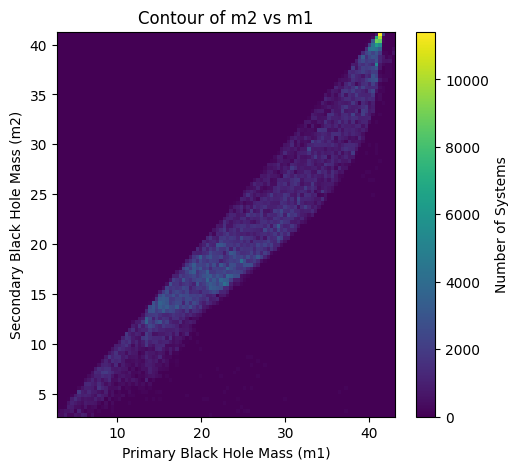

In [15]:
# Create a 2D histogram of m1_corrected and m2_corrected
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist2d(m1, m2, bins=100, cmap='viridis')
plt.colorbar(label='Number of Systems')
plt.xlabel('Primary Black Hole Mass (m1)')
plt.ylabel('Secondary Black Hole Mass (m2)')
plt.title('Contour of m2 vs m1')


In [18]:
# Compute the chirp mass and total mass
chirp_mass = (m1 * m2) ** (3 / 5) / (m1 + m2) ** (1 / 5)
total_mass = m1 + m2


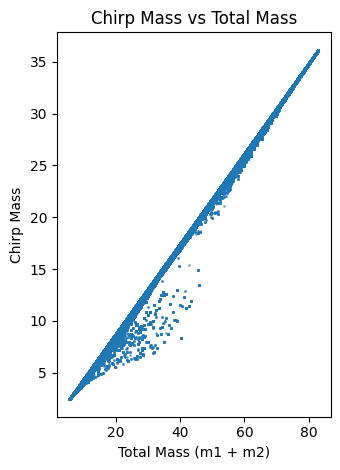

In [19]:
# Plot the chirp mass vs total mass
plt.subplot(1, 2, 2)
plt.scatter(total_mass, chirp_mass, s=1, alpha=0.5)
plt.xlabel('Total Mass (m1 + m2)')
plt.ylabel('Chirp Mass')
plt.title('Chirp Mass vs Total Mass')

plt.tight_layout()
plt.show()


Exercise 6

In [23]:
data = np.loadtxt('/home/chris/PythonAdvanced/090924/time_BHillustris1_30.dat')
# Read columns
metallicity = data[:10000, 3]  # Column 4
delay_time = data[:10000, 8]   # Column 9
m1_10k = np.maximum(data[:10000, 6], data[:10000, 7])
m2_10k = np.minimum(data[:10000, 6], data[:10000, 7])
total_mass = m1_10k + m2_10k

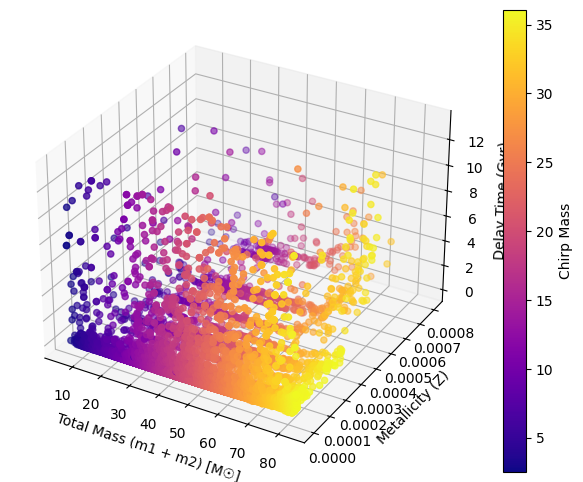

In [24]:
# Calculate chirp mass
chirp_mass = (m1_10k * m2_10k)**(3/5) / (total_mass)**(1/5)

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(total_mass, metallicity, delay_time, c=chirp_mass, cmap='plasma')
fig.colorbar(scatter, label='Chirp Mass')

ax.set_xlabel('Total Mass (m1 + m2) [M☉]')
ax.set_ylabel('Metallicity (Z)')
ax.set_zlabel('Delay Time (Gyr)')

plt.show()